In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F 


In [2]:
from bigram_network_train import load_raw_data, str_encoders

In [3]:
names_lines = load_raw_data()

In [4]:
stoi, itos = str_encoders(names_lines)

In [5]:
print(len(stoi), len(itos))

27 27


### Input Output prep

In [6]:
num_lines = None
names_to_iter = names_lines[:num_lines] if num_lines else names_lines
xs, ys = [], []
for name in names_to_iter:
    name = '.' + name + '.'
    for fc, sc in zip(name, name[1:]):
        xi = stoi[fc]
        yi = stoi[sc]
        xs.append(xi)
        ys.append(yi)
xs, ys = torch.tensor(xs), torch.tensor(ys)

In [8]:
rand_idx = torch.randperm(len(xs))

In [11]:
xs = xs[rand_idx]
ys = ys[rand_idx]

In [12]:
xs.shape, ys.shape

(torch.Size([228146]), torch.Size([228146]))

In [13]:

i80 = round(len(ys)*8/10)
i90 = round(len(ys)*9/10)
i80, i90

(182517, 205331)

In [14]:
xs_train, xs_dev, xs_test = xs[:i80], xs[i80:i90], xs[i90:]
ys_train, ys_dev, ys_test = ys[:i80], ys[i80:i90], ys[i90:]
print(xs_train.shape, xs_dev.shape, xs_test.shape)
print(ys_train.shape, ys_dev.shape, ys_test.shape)

torch.Size([182517]) torch.Size([22814]) torch.Size([22815])
torch.Size([182517]) torch.Size([22814]) torch.Size([22815])


In [15]:
xs[:5]

tensor([ 0, 18,  9, 12, 25])

In [16]:
x_enc = F.one_hot(xs, num_classes=len(stoi)).float()

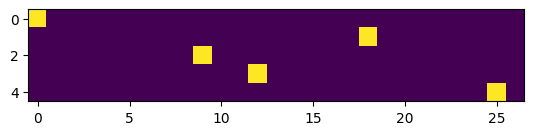

In [17]:
plt.imshow(x_enc[0:5])

In [18]:
class BigramModel:
    
    @staticmethod
    def nll(likelihood):
        return -1*torch.log(likelihood)
    
    def __init__(self, stoi, itos) -> None:
        self.stoi = stoi
        self.itos = itos
        self.g = torch.Generator().manual_seed(1234)
        self.W = torch.randn(len(self.stoi), len(self.stoi), generator=self.g, requires_grad=True)
        self.W.grad = None
        
    def encode(self, xs):
        return F.one_hot(xs, num_classes=len(stoi)).float()
        
    def forward(self, xs):
        x_enc = self.encode(xs)
        logits = x_enc @ self.W
        counts = logits.exp()
        return counts/counts.sum(1, keepdim=True)
        
    def loss(self, probs, ys):
        likelihood = probs[torch.arange(len(ys)), ys]
        return self.nll(likelihood).mean()
    
    def step(self, lr):
        self.W.data += -1*lr*self.W.grad
        
    def run(self, xs, ys, num, lr):
        losses = []
        for _ in range(num):
            self.W.grad = None
            probs = self.forward(xs)
            loss = self.loss(probs, ys)
            loss.backward()
            self.step(lr)
            losses.append(loss.item())
            
        return losses

In [19]:
model = BigramModel(stoi, itos)
losses = model.run(xs_train, ys_train, 10, 0.1)
losses[::2]

[3.83050274848938,
 3.829176425933838,
 3.827852249145508,
 3.8265304565429688,
 3.825212240219116]

In [20]:
-1*torch.log(torch.tensor([1/27.0]))

tensor([3.2958])

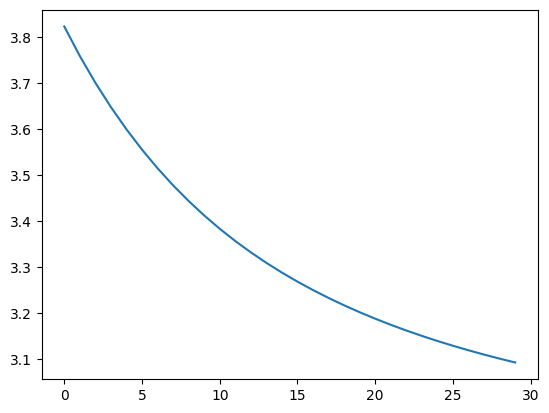

In [21]:
losses = model.run(xs_train, ys_train, 30, 10)
plt.plot(losses)

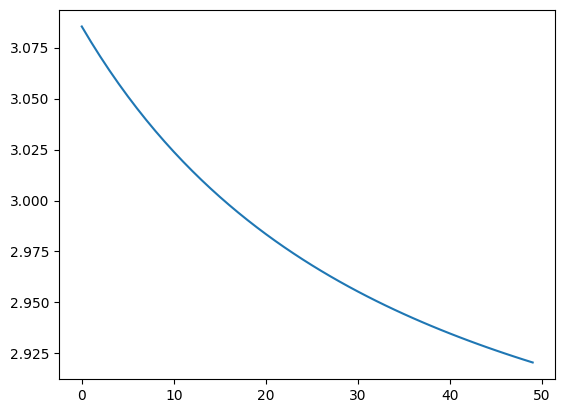

In [22]:
losses = model.run(xs_train, ys_train, 50, 10)
plt.plot(losses)

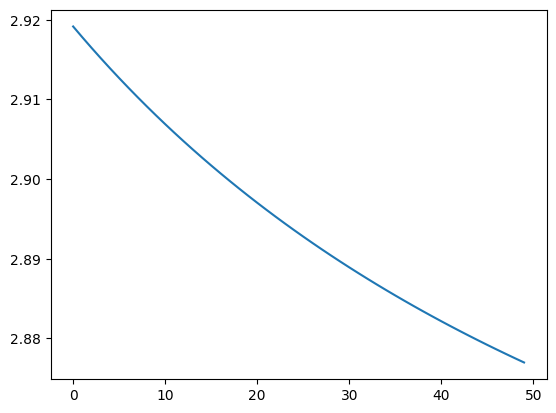

In [23]:
losses = model.run(xs_train, ys_train, 50, 10)
plt.plot(losses)

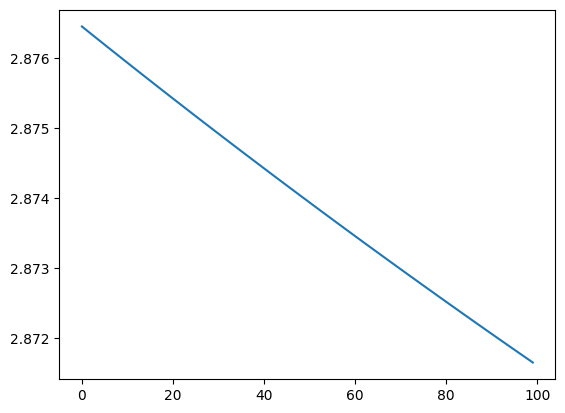

In [24]:
losses = model.run(xs_train, ys_train, 100, 1)
plt.plot(losses)

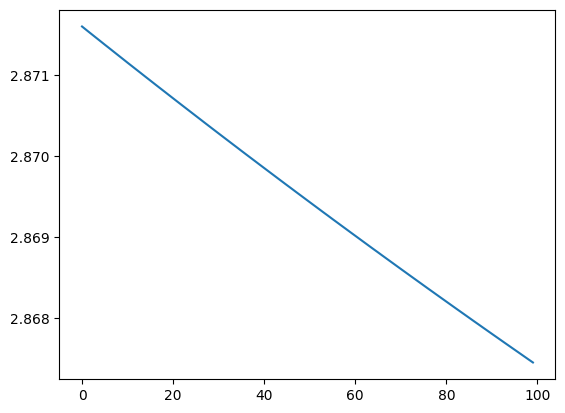

In [25]:
losses = model.run(xs_train, ys_train, 100, 1)
plt.plot(losses)

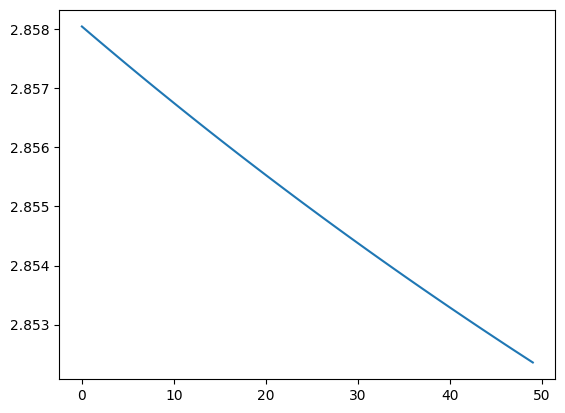

In [27]:
losses = model.run(xs_train, ys_train, 50, 5)
plt.plot(losses)

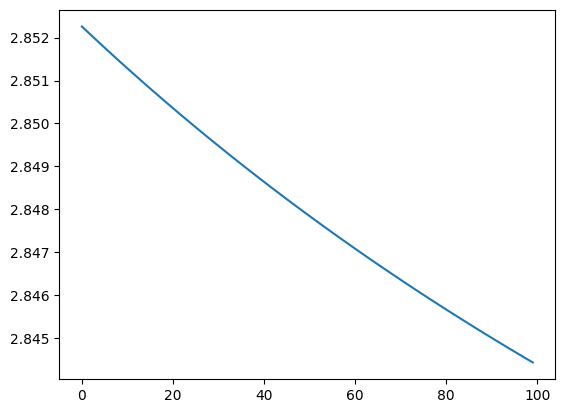

In [28]:
losses = model.run(xs_train, ys_train, 100, 5)
plt.plot(losses)

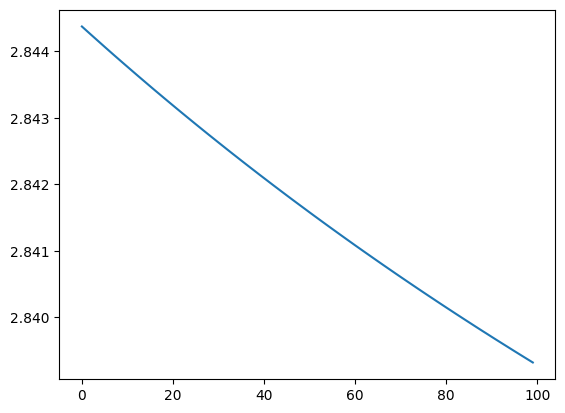

In [29]:
losses = model.run(xs_train, ys_train, 100, 5)
plt.plot(losses)

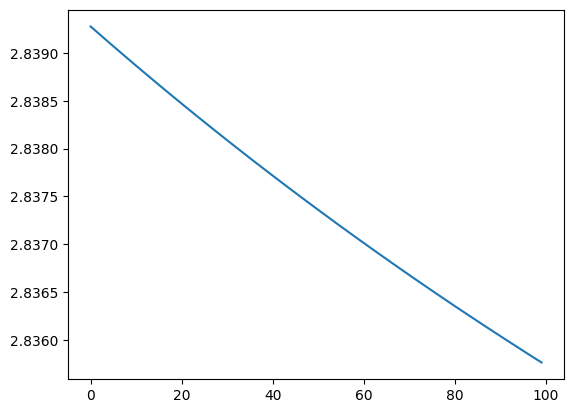

In [30]:
losses = model.run(xs_train, ys_train, 100, 5)
plt.plot(losses)

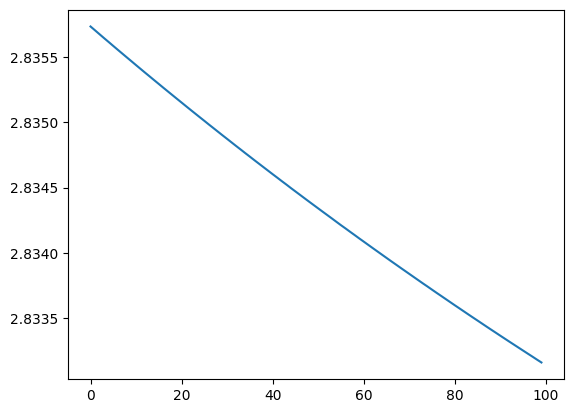

In [31]:
losses = model.run(xs_train, ys_train, 100, 5)
plt.plot(losses)

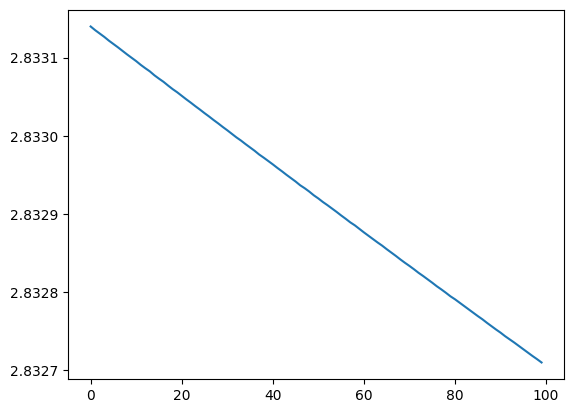

In [32]:
losses = model.run(xs_train, ys_train, 100, 1)
plt.plot(losses)

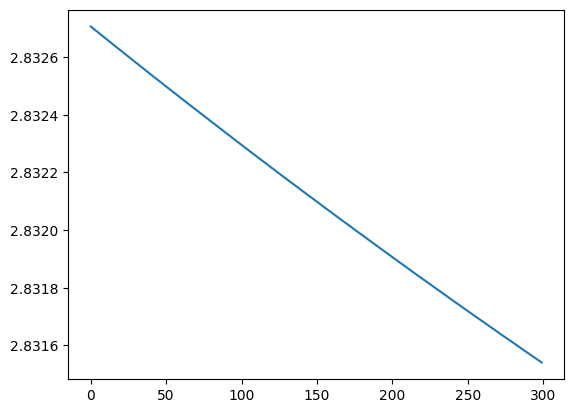

In [33]:
losses = model.run(xs_train, ys_train, 300, 1)
plt.plot(losses)

In [34]:
losses[-1]

2.831541061401367

In [35]:
print(f"train loss is {model.loss(model.forward(xs_train), ys_train)}")
print(f"dev loss is {model.loss(model.forward(xs_dev), ys_dev)}")

train loss is 2.8315377235412598
dev loss is 2.830794334411621
